[View in Colaboratory](https://colab.research.google.com/github/attrigirish/python-ml/blob/master/Clustering.ipynb)

# Clustering (Unsupervised Learning)

The objective of clustering is to find relationships and meaning in data.


Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.


Types of Clustering

1. **Connectivity models:** As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.
2. **Centroid models:** These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.
3. **Distribution models:** These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution. These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.
4. **Density Models:** These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.



1. Recommendation engines
2. Market segmentation
3. Social network analysis
4. Search result grouping
5. Medical imaging
6. Image segmentation
7. Anomaly detection

# K-means clustering

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :

1. Specify the desired number of clusters K.
2. Randomly assign each data point to a cluster.
3. Compute cluster centroids.
4. Re-assign each point to the closest cluster centroid.
5. Re-compute cluster centroids.




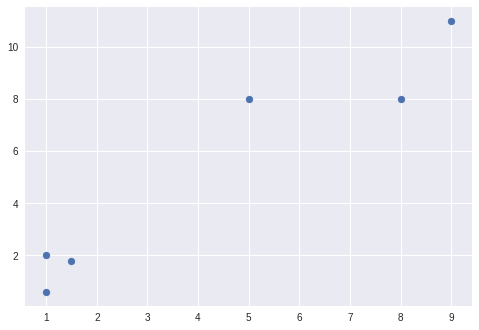

In [3]:
#Clustering on Non Numerical Data

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#ORIGINAL:

X=np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

plt.scatter(X[:, 0], X[:, 1])

In [4]:
#Loading Classifier

clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
#Grabbing Centroids and labels

centroids = clf.cluster_centers_
labels = clf.labels_

print(centroids)
print(labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 1 0 0 1 0]


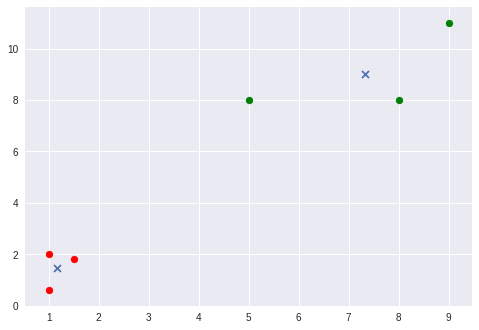

In [15]:
colors = ["g","r"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])
    
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x")

# Image Compression using Clustering

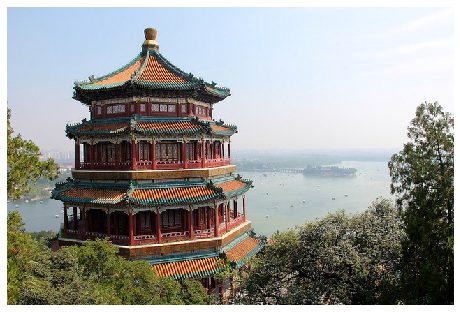

In [25]:
#Loading Dataset
!pip install -q pillow

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [26]:
#Determining Shape of Dataset

china.shape

(427, 640, 3)

In [27]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

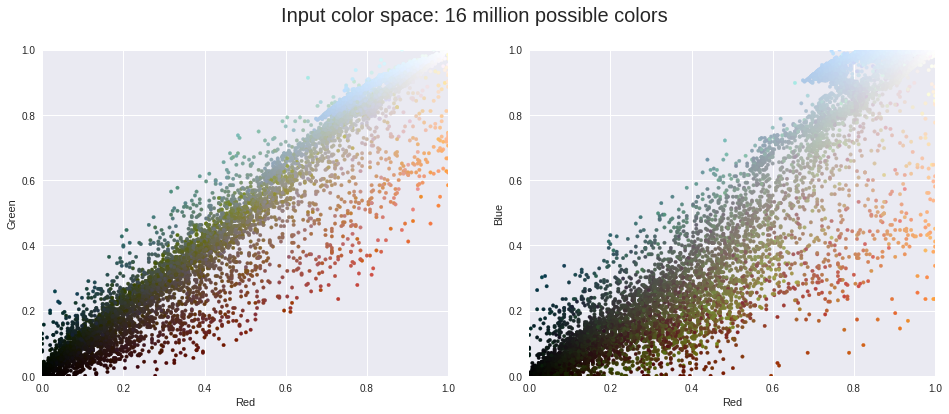

In [29]:
#Plotting pixels using a subset of 10000 pixels

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
    
    
plot_pixels(data, title='Input color space: 16 million possible colors')

In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

In [0]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);